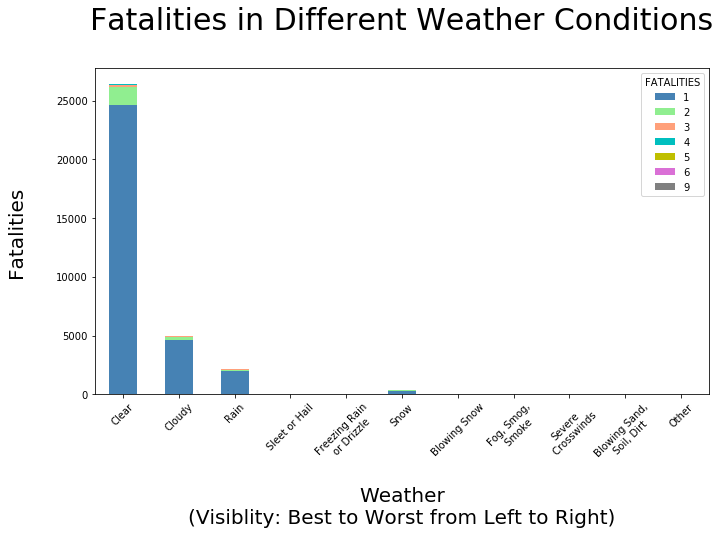

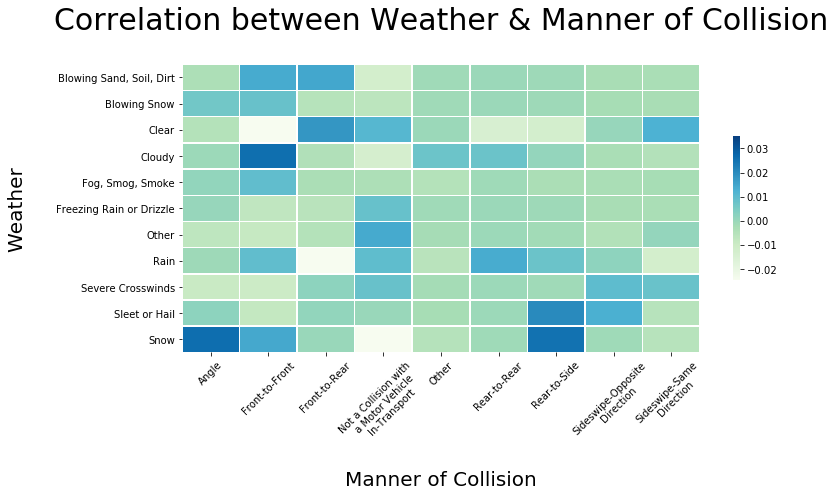

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# create a complete df only for Charlie
def Charlie_first_df(main_csv):
    first_df = pd.DataFrame({'WEATHER': main_csv['WEATHER'],
                             'MAN_COLL': main_csv['MAN_COLL'],
                             'FATALS': main_csv['FATALS']
                            })
    first_df['WEATHER'] = first_df['WEATHER'].replace({'Not Reported': 'Clear',
                                                       'Unknown': 'Clear'})
    first_df['MAN_COLL'] = first_df['MAN_COLL'].replace({'Not Reported': 
                                                         'Not a Collision with a Motor Vehicle In-Transport',
                                                         'Unknown': 
                                                         'Not a Collision with a Motor Vehicle In-Transport'})
    first_df['MAN_COLL'] = first_df['MAN_COLL'].replace({'Not a Collision with a Motor Vehicle In-Transport':
                                                         'Not a Collision with\n a Motor Vehicle\n In-Transport',
                                                         'Sideswipe-Opposite Direction':
                                                         'Sideswipe-Opposite\n Direction',
                                                         'Sideswipe-Same Direction':
                                                         'Sideswipe-Same\n Direction'
                                                        })
    return first_df

# Create a histogram to analyze "Bad Weather could lead to increased number of accidents?"  
def weather_fatals_hist(first_df):
    C_weather_df = first_df.drop('MAN_COLL', axis=1)

    fatals = [1,2,3,4,5,6,9]
    colors = ['steelblue','lightgreen','lightsalmon','c','y','orchid','grey']
    columns = ['1', '2', '3', '4', '5', '6', '9']
    weathers = ['Clear', 'Cloudy', 'Rain', 'Sleet or Hail', 
            'Freezing Rain\n or Drizzle', 'Snow', 'Blowing Snow', 
            'Fog, Smog,\n Smoke', 'Severe\n Crosswinds', 'Blowing Sand,\n Soil, Dirt', 'Other']
    stack_list = []

    for i in range(7):
        fatal = C_weather_df.loc[C_weather_df['FATALS']==fatals[i]]
        temp_df = fatal.groupby(['WEATHER']).count()
        Fatal = temp_df.reindex(weathers)
        stack_list.append(Fatal)

    stacked_df = pd.concat(stack_list, axis = 1)
    stacked_df.columns = columns
    ax = stacked_df.plot(kind='bar', stacked=True, color=colors,
                         figsize=[11,6])
    title = ax.set_title('Fatalities in Different Weather Conditions', fontsize=30)
    ax.set_ylabel('Fatalities', fontsize=20, labelpad=30)
    ax.set_xlabel('Weather\n(Visiblity: Best to Worst from Left to Right)',
                  fontsize=20, labelpad=20)
    ax.legend(title='FATALITIES')
    ax.set_xticklabels(weathers, rotation=45)
    title.set_position([0.5,1.1])
    plt.savefig('weather_fatals_hist.png', bbox_inches='tight')
    
#create dummies
def create_corr(df):
    weather_dummies = pd.get_dummies(df['WEATHER'])
    man_coll_dummies = pd.get_dummies(df['MAN_COLL'])
    heat_df = pd.concat([weather_dummies, man_coll_dummies], axis = 1)
    corr = heat_df.corr()
    w_m_corr = corr.iloc[:11, 11:]
    return w_m_corr

#create heatmap with correlation
def create_heatmap(w_m_heat):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1.5,1])
    sns.heatmap(w_m_heat, cmap='GnBu', vmax=0.035, robust=True,
                square=False, linewidths=.5, cbar_kws={"shrink": .5})
    title = ax.set_title('Correlation between Weather & Manner of Collision', fontsize=30)
    ax.set_ylabel('Weather', fontsize=20, labelpad=30)
    ax.set_xlabel('Manner of Collision', fontsize=20, labelpad=20)
    ax.set_xticklabels(w_m_heat.columns, rotation=45)
    title.set_position([0.5,1.1])
    plt.savefig('weather_man_coll_heatmap.png', bbox_inches='tight')
    
def Charlie_plot():
    C_main_csv = pd.read_csv('accidents-final.csv')
    first_df = Charlie_first_df(C_main_csv)
    weather_fatals_hist(first_df)
    w_m_heat = create_corr(first_df)
    create_heatmap(w_m_heat)
    plt.show()
    
Charlie_plot()